In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('vaccinations.csv', na_values = ['n/a', '\s+', "N/A"])
df.shape

(21693, 12)

In [7]:
print(df.duplicated().sum())

0


In [3]:
df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


In [8]:
print(df.isnull().any().sum())                            # rechecking number of column having missing values 
print(df.isnull().any(axis = 1).sum())                     # rechecking number of rows having missing values

9
13033


In [17]:
cols = df.columns[df.isnull().mean()>0.60]       #displaying columns with more than 70% missing values
cols

#df = df.drop(cols, axis=1)  

Index([], dtype='object')

In [29]:

df.dropna(subset = ["daily_vaccinations"], inplace=True)
df.dropna(subset = ["total_vaccinations"], inplace=True)


In [40]:
cols = df.columns[df.isnull().mean()>0.01]       #displaying columns with more than 70% missing values
df = df.drop(cols, axis=1)

In [41]:
df.head()

,location,iso_code,date,total_vaccinations,daily_vaccinations,total_vaccinations_per_hundred,daily_vaccinations_per_million
6,Afghanistan,AFG,2021-02-28,8200.0,1367.0,0.02,35.0
22,Afghanistan,AFG,2021-03-16,54000.0,2862.0,0.14,74.0
44,Afghanistan,AFG,2021-04-07,120000.0,3000.0,0.31,77.0
59,Afghanistan,AFG,2021-04-22,240000.0,8000.0,0.62,206.0
78,Afghanistan,AFG,2021-05-11,504502.0,13921.0,1.30,358.0


In [42]:
df.isna().sum()           #displaying columns with missing values

location                          0
iso_code                          0
date                              0
total_vaccinations                0
daily_vaccinations                0
total_vaccinations_per_hundred    0
daily_vaccinations_per_million    0
dtype: int64

In [43]:
for col in df.columns:                                          #getting percentage of missing values in columns
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col, round(pct_missing*100)))

location-0%
iso_code-0%
date-0%
total_vaccinations-0%
daily_vaccinations-0%
total_vaccinations_per_hundred-0%
daily_vaccinations_per_million-0%


In [49]:
df.dtypes

location                                  object
iso_code                                  object
date                                      object
total_vaccinations                       float64
daily_vaccinations                       float64
total_vaccinations_per_hundred           float64
daily_vaccinations_per_million           float64
new_date                          datetime64[ns]
dtype: object

In [52]:
#df['new_date'] = [d.date() for d in df['date']]
df["new_date"]= pd.to_datetime(df["date"], errors='coerce')
df['Month'] = df.new_date.dt.month
df['day'] = df.new_date.dt.day
df['Year'] = df.new_date.dt.year
df['Day Name']=pd.to_datetime(df['new_date']).dt.day_name()
df['Month Name']=pd.to_datetime(df['new_date']).dt.month_name()
df = df.drop(['date'], axis=1)


In [58]:
df['total_vaccinations'] = df['total_vaccinations'].astype(int) 
df['daily_vaccinations'] = df['daily_vaccinations'].astype(int) 

In [ ]:
#outliers
bl = df[ (df['balance'] >= 17500)].index  # considering values below 40000 as an outlier 
df.drop(bl , inplace=True)

df.boxplot(column=['balance']) 
df["balance"].describe() 

In [63]:
pd.set_option('display.max_rows', None) 
df['iso_code'].value_counts()

OWID_HIC    172
OWID_EUR    172
NOR         172
OWID_WRL    172
OWID_NAM    160
CAN         160
OWID_SCT    158
OWID_ASI    156
ISR         155
OWID_UMC    150
OWID_SAM    150
CHL         149
LIE         148
PRT         147
SVN         147
LTU         147
ITA         147
OWID_EUN    147
CZE         147
DNK         147
ROU         147
AUT         147
EST         147
FRA         146
DEU         145
BEL         145
OWID_ENG    143
LVA         141
USA         140
BGR         140
SVK         139
HUN         137
MEX         136
ARE         134
GBR         133
OWID_WLS    131
OWID_NIR    131
TUR         129
GRC         128
OWID_LMC    128
OWID_AFR    125
MLT         125
ARG         125
IND         123
POL         119
BRA         116
FIN         115
CHE         115
MDV         105
PER         102
GIB         100
BHR          99
OWID_OCE     99
ESP          97
AUS          97
IRL          96
KHM          96
SAU          93
MAR          93
IDN          92
ZWE          91
SRB          91
MAC     

count    12884.000000
mean        17.863963
std         25.172462
min          0.000000
25%          1.607500
50%          7.570000
75%         23.792500
max        226.140000
Name: total_vaccinations_per_hundred, dtype: float64

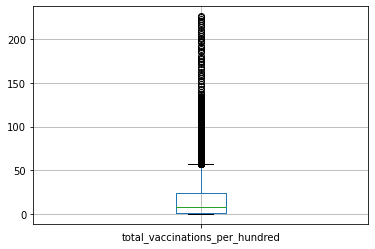

In [67]:


df.boxplot(column=['total_vaccinations_per_hundred']) 
df["total_vaccinations_per_hundred"].describe() 

In [68]:
df.to_csv('vacc.csv',index=False)

In [25]:
df['total_vaccinations'].value_counts()

0.0           129
7.0            26
2.0            14
8649.0         10
1.0             9
             ... 
54587.0         1
95016900.0      1
4148923.0       1
9779909.0       1
423092.0        1
Name: total_vaccinations, Length: 12614, dtype: int64